# AutoViz: uma alternativa para otimizar sua Análise Exploratória de Dados (EDA)
![exploration](https://cff2.earth.com/uploads/2020/11/02095321/shutterstock_138031868-960x601.jpg)

## Sumário do Artigo
>#### <ul> 1. Importância  </ul>
>#### <ul> 2. Problema  </ul>
>#### <ul> 3. Solução  </ul>
>#### <ul> 4. Considerações Finais  </ul>

## 1) Importância  
Uma das etapas essenciais de um **bom** *pipeline* de dados é sua correta exploração. É impossível construir um modelo de ***Machine Learning*** robusto sem entender como as variáveis de entrada se relacionam umas com as outras e com o objetivo do estudo. Com certeza você já ouviu a frase: "*Garbage in, garbage out*". Significa literalmente que um algoritmo será tão bom quanto os seus dados de entrada.
<br></br>

Outro forte argumento a favor da EDA é que **não raramente o problema de negócio pode ser resolvido na etapa de análise de dados**. Nem sempre a etapa final do pipeline do Cientista de Dados consiste na produção e deploy de um algoritmo de Machine Learning. O objetivo final do profissional de dados é gerar valor para a empresa, seja pela maximização dos lucros, minimização dos custos ou otimização de processos (ou os 3 juntos).
<br></br>

Com o *hype* atual envolvendo Inteligência Artifical, frequentemente vemos Machine Learning sendo aplicados à problemas que podem ser resolvidos com simplicidade, elegância e eficácia sem a necessidade de Machine Learning. Além disso, com um bom entendimento das variáveis do problema e conhecimento do negócio, torna-se muito mais fácil a manutenção de produtos de dados já implementados.  
<br></br>
>### "Quanto mais conhecimento sobre os inputs, menos Black Box serão seus outputs"
<br></br>
## 2) Problema
Na maioria das vezes o problema em análise envolve múltiplas variáveis. É rotineiro lidar com bases de dados com 20, 50, 100 ou até mais variáveis independentes. Por onde começar a análise exploratória? Quais variáveis se relacionam com as outras? Quais mais se relacionam com a variável alvo? Quais melhor auxiliam na resolução do problema de negócio?
<br></br>

A questão não é responder as perguntas acima. Isto é relativamente simples. O fator principal é o **tempo** que levaremos para extrair *insights* úteis desse conjunto de dados. Para otimizar a escassez de tempo surgem as ferramentas de "*AutoEDA*", como a que apresentarei logo abaixo: **AutoViz**. O objetivo principal não é reduzir a etapa de Anállise Exploratória de Dados à uma simples chamada de função, longe disso...
<br></br>

A cereja do bolo é extrair o **máximo de informação** na **menor quantidade de tempo** possível de modo a realizar uma Análise Exploratória eficaz e aplicável. Quantos notebooks com diversos gráficos e nenhuma informação extraída você já leu? Quem nunca perdeu horas buscando *scatterplots* que fizessem algum sentido?
<br></br>

## 3) Solução
Agora que você conhece a importância de uma boa Análise Exploratória e as principais dificuldades de realizá-la, vamos ver na prática como isso funciona. O primeiro passo é instalar a biblioteca [AutoViz](https://pypi.org/project/autoviz/):  
<br></br>
`pip install autoviz`
<br></br>

Para fins de exemplo, nesse artigo escolhi uma base de dados de resultados de jogos de futebol. A razão da escolha é que eu não entendo nada de futebol, e quero te mostrar que é possível extrair informações valiosas de maneira rápida, direcionando os próximos passos da análise. Você pode acessar a base de dados [clicando aqui](https://www.kaggle.com/datasets/gravix/european-soccer?sort=votes). A variável alvo (FTR) corresponde ao resultado da partida de futebol, sendo H = time da casa ganha, D é um empate e A o time de fora ganha.
<br></br>

In [2]:
# importando bibliotecas
# dataframes + linalg
import pandas as pd
import numpy as np

# classe Autoviz_Class
from autoviz.AutoViz_Class import AutoViz_Class

# Scikit-learn
from sklearn.feature_selection import VarianceThreshold 

# gráficos
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
%matplotlib inline

- Abaixo visualizamos se a importação dos dados ocorreu conforme esperado.

In [114]:
df = pd.read_csv('european_soccer.csv')
df.head(4)

Div        Date    HomeTeam     AwayTeam  FTHG  FTAG FTR  HTHG  HTAG HTR  \
0  B1  2010-07-30    Standard      Waregem   1.0   1.0   D   0.0   1.0   A   
1  B1  2010-07-31  Anderlecht        Eupen   4.0   1.0   H   0.0   1.0   A   
2  B1  2010-07-31    Kortrijk  Club Brugge   1.0   0.0   H   0.0   0.0   D   
3  B1  2010-07-31    Mechelen      Lokeren   2.0   0.0   H   0.0   0.0   D   

   ...  B365CAHH  B365CAHA  PCAHH  PCAHA  MaxCAHH  MaxCAHA  AvgCAHH  AvgCAHA  \
0  ...       NaN       NaN    NaN    NaN      NaN      NaN      NaN      NaN   
1  ...       NaN       NaN    NaN    NaN      NaN      NaN      NaN      NaN   
2  ...       NaN       NaN    NaN    NaN      NaN      NaN      NaN      NaN   
3  ...       NaN       NaN    NaN    NaN      NaN      NaN      NaN      NaN   

   CurrentDivision  DayOfWeek  
0                1          4  
1                1          5  
2                1          5  
3                1          5  

[4 rows x 150 columns]

In [115]:
df.tail()

Div        Date   HomeTeam    AwayTeam  FTHG  FTAG FTR  HTHG  HTAG HTR  \
55501  I1  2019-10-20      Parma       Genoa   5.0   1.0   H   3.0   0.0   H   
55502  I1  2019-10-20      Milan       Lecce   2.0   2.0   D   1.0   0.0   H   
55503  D2  2019-10-20     Bochum   Karlsruhe   3.0   3.0   D   3.0   2.0   H   
55504  I1  2019-10-20   Sassuolo       Inter   3.0   4.0   A   1.0   3.0   A   
55505  F1  2019-10-20  Marseille  Strasbourg   2.0   0.0   H   1.0   0.0   H   

       ...  B365CAHH  B365CAHA  PCAHH  PCAHA  MaxCAHH  MaxCAHA  AvgCAHH  \
55501  ...      1.92      2.01   1.90   2.01     1.93     2.10     1.89   
55502  ...      1.94      1.99   1.93   2.00     2.00     2.05     1.93   
55503  ...      1.77      2.10   1.79   2.11     1.88     2.17     1.80   
55504  ...      2.06      1.87   2.05   1.87     2.08     1.88     2.02   
55505  ...      1.83      2.10   1.83   2.09     1.85     2.10     1.81   

       AvgCAHA  CurrentDivision  DayOfWeek  
55501     1.99                1          6  
55502     1.95                1          6  
55503     2.06                2          6  
55504     1.86                1          6  
55505     2.06                1          6  

[5 rows x 150 columns]

In [116]:
df.shape

(55506, 150)

Por se tratar de um problema com dependência temporal, antes de realizarmos qualquer manipulação ou análise sobre os dados é necessário dividir a base em dois períodos: treino e teste. O subset de treino pode ser usado para a análise exploratória, modelagem preditiva, validação de métricas e seleção de variáveis e demais estudos. Já o subset de teste é intocável até que concluamos nosso objetivo!

Essa é uma boa prática no pipeline de dados, pois impossibilita a ocorrência de *Data Leakage* e a contaminação das métricas de modelagem. Nesse caso, opto por selecionar os primeiros 30 mil registros como base *in-sample* para título de exemplificar o uso da AutoViz.

In [117]:
# reatribuo o valor de df para selecionar apenas os primeiros 30 mil registros
df, _ = df.iloc[:30000, :], df.iloc[30000:, :]
df.shape

(30000, 150)

In [118]:
df.isna().sum().sort_values(ascending=False)[:5]

Unnamed: 70    30000
Unnamed: 60    30000
MaxAHH         30000
PAHA           30000
PAHH           30000
dtype: int64

- Observamos acima que a base de dados possui diversas variáveis com valores do tipo NaN. Existem duas alternativas:  
    - A mais adequada é analisar a base com essas variáveis presentes. Porém, como o objetivo é apresentar uma ferramenta, seguiremos a opção abaixo.
    - Excluir as variáveis com mais de X % de valores NaN. Opto por essa solução, pela quantidade de variáveis na base ser muito grande e seleciono um *cutoff* de 1% para excluir as colunas com muitos valores faltantes.

In [119]:
# excluo colunas com mais de 1% de valores NaN. Esse ponto de corte é arbitrário!
df = df.loc[:, df.isnull().mean() < .01]

In [120]:
df.head()

Div        Date    HomeTeam     AwayTeam  FTHG  FTAG FTR  HTHG  HTAG HTR  \
0  B1  2010-07-30    Standard      Waregem   1.0   1.0   D   0.0   1.0   A   
1  B1  2010-07-31  Anderlecht        Eupen   4.0   1.0   H   0.0   1.0   A   
2  B1  2010-07-31    Kortrijk  Club Brugge   1.0   0.0   H   0.0   0.0   D   
3  B1  2010-07-31    Mechelen      Lokeren   2.0   0.0   H   0.0   0.0   D   
4  B1  2010-07-31  St Truiden       Lierse   1.0   0.0   H   1.0   0.0   H   

   ...  BbAv<2.5  BbAH  BbAHh  BbMxAHH  BbAvAHH  BbMxAHA  BbAvAHA  Season  \
0  ...      1.83   8.0    0.0     1.33     1.27     3.80     3.48    2010   
1  ...      2.41   8.0    0.0     1.05     1.03    11.48     9.53    2010   
2  ...      2.01  10.0    0.0     2.75     2.62     1.50     1.43    2010   
3  ...      2.00   9.0   -0.5     2.07     2.02     1.88     1.82    2010   
4  ...      1.93  10.0    0.0     1.62     1.56     2.50     2.31    2010   

   CurrentDivision  DayOfWeek  
0                1          4  
1                1          5  
2                1          5  
3                1          5  
4                1          5  

[5 rows x 49 columns]

Como ainda temos muitas variáveis, quero reduzir ainda mais o universo de variáveis, com o foco em selecionar três ou quatro candidatas para determinar a vitória de um time de futebol. Uma forma de *Feature Selection* interessante nesse caso é a eliminação de variáveis que possuem baixa variância.  

Abaixo realizo a seleção de variáveis cuja variância seja maior que um limite arbitrário de 95%. Novamente, reitero que tanto o cutoff da eliminação de dados faltantes quanto o nível mínimo de variância podem (e devem) ser definidos com mais critério.

In [121]:
# objeto variance threshold
vt = VarianceThreshold(threshold = .95)

# fit_transform das variáveis independentes
y = df['FTR']
cols_to_drop = [col for col in df.columns if col != 'FTR' and df[col].dtype != 'object']
df = vt.fit_transform(df[cols_to_drop])
df.shape

(30000, 26)

Abaixo podemos verificar as variáveis selecionadas

In [135]:
vt.get_feature_names_out()

array(['FTHG', 'FTAG', 'B365H', 'B365A', 'BWH', 'BWA', 'IWH', 'IWA',
       'LBH', 'LBA', 'WHH', 'WHA', 'VCH', 'VCD', 'VCA', 'Bb1X2', 'BbMxH',
       'BbAvH', 'BbMxD', 'BbMxA', 'BbAvA', 'BbOU', 'BbAvAHH', 'BbMxAHA',
       'Season', 'DayOfWeek'], dtype=object)

In [123]:
# adiciono o alvo novamente e concateno 
data = np.concatenate([df, y.values.reshape(-1,1)], axis = 1)
data.shape

(30000, 27)

In [136]:
# numpy para dataframe
features = list(vt.get_feature_names_out())
features.append('FTR')
data = pd.DataFrame(data, columns = features)

# salvo a base de dados após data wrangling
data.to_csv('clean_base.csv')

- O próximo passo é instanciar um objeto da classe AutoViz_Class(), passando como parâmetros para o método AutoViz a base de dados e a variável dependente. Simples assim. Vocẽ pode consultar o output completo da célula abaixo no notebook do GitHub. Abaixo, trago apenas os plots que mais me chamaram a atenção do ponto de vista da qualidade na diferenciação do alvo conforme os valores A, D e H.

Shape of your Data Set loaded: (30000, 28)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
Data cleaning improvement suggestions. Complete them before proceeding to ML modeling.


    27 Predictors classified...
        1 variables removed since they were ID or low-information variables
        List of variables removed: ['Unnamed: 0']

################ Multi_Classification problem #####################


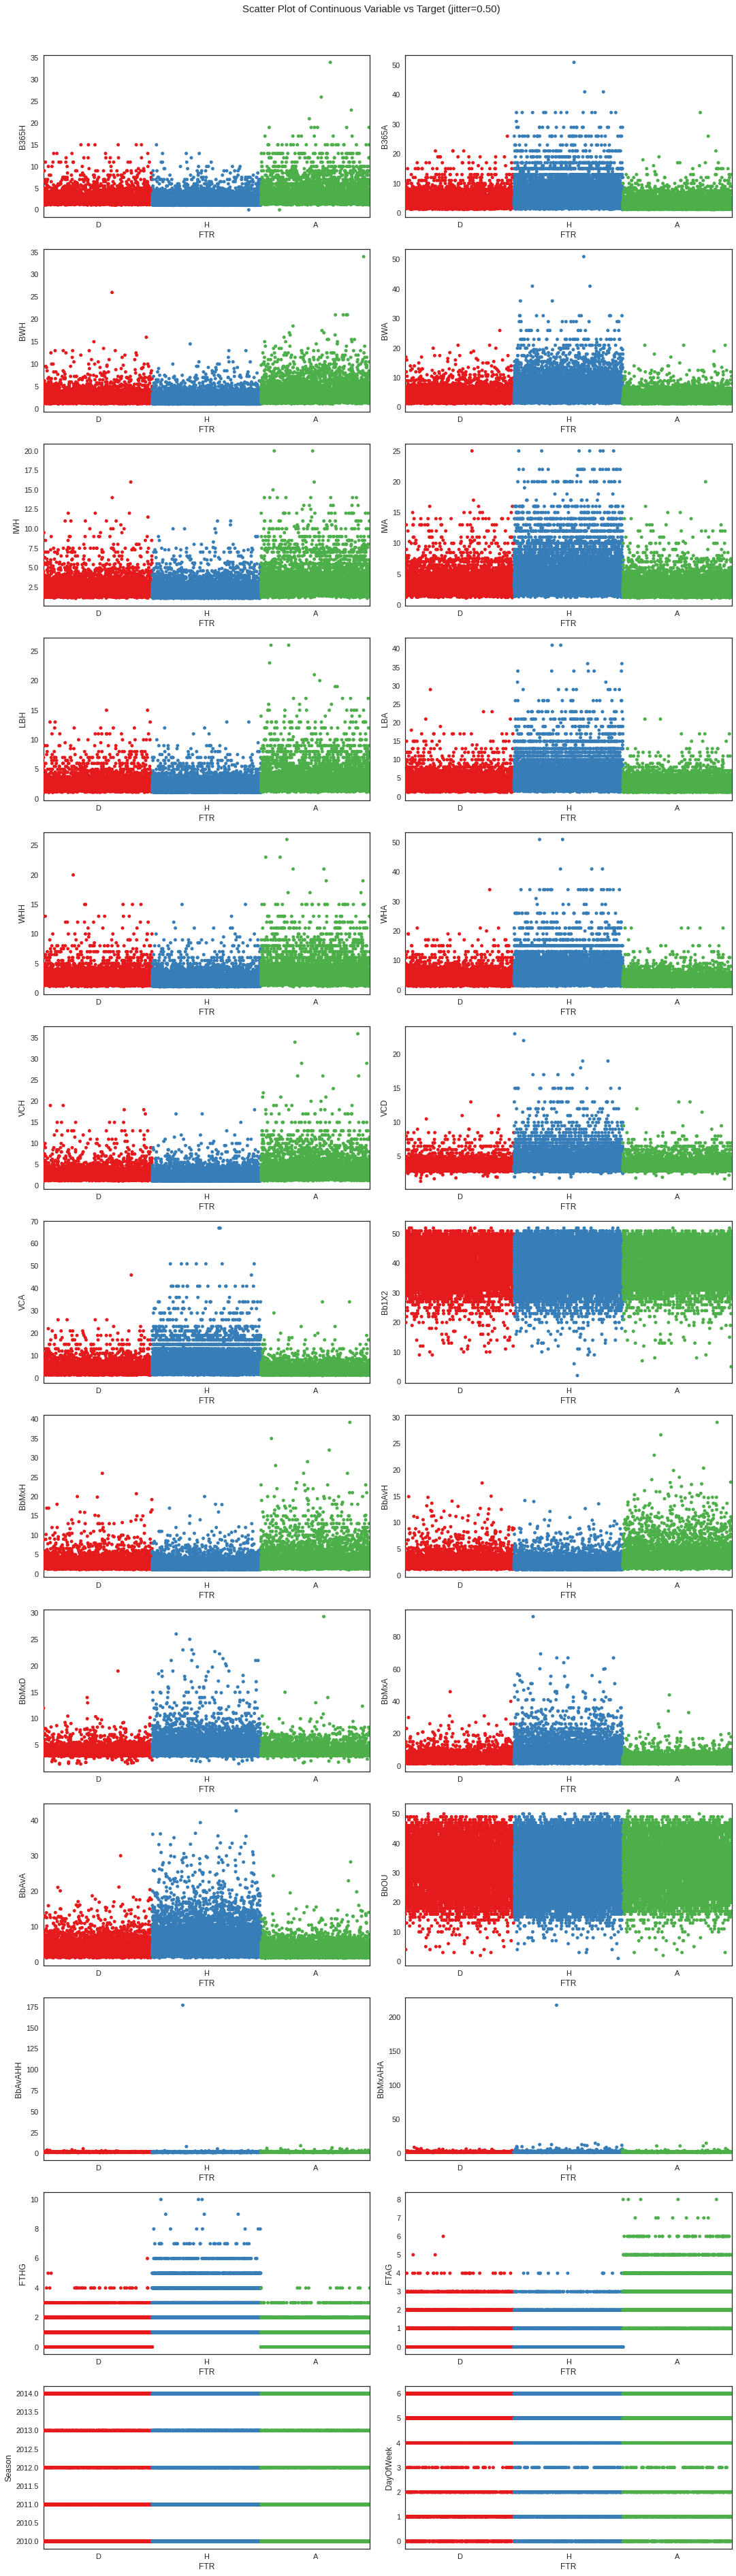

Total Number of Scatter Plots = 351


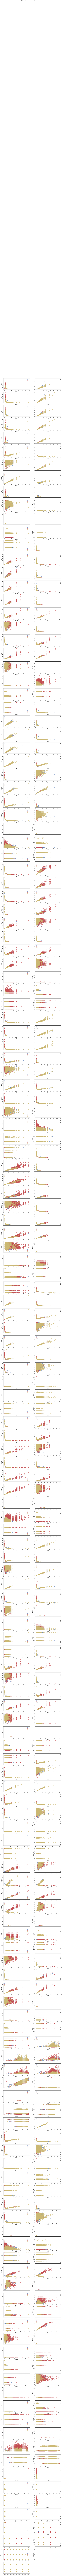

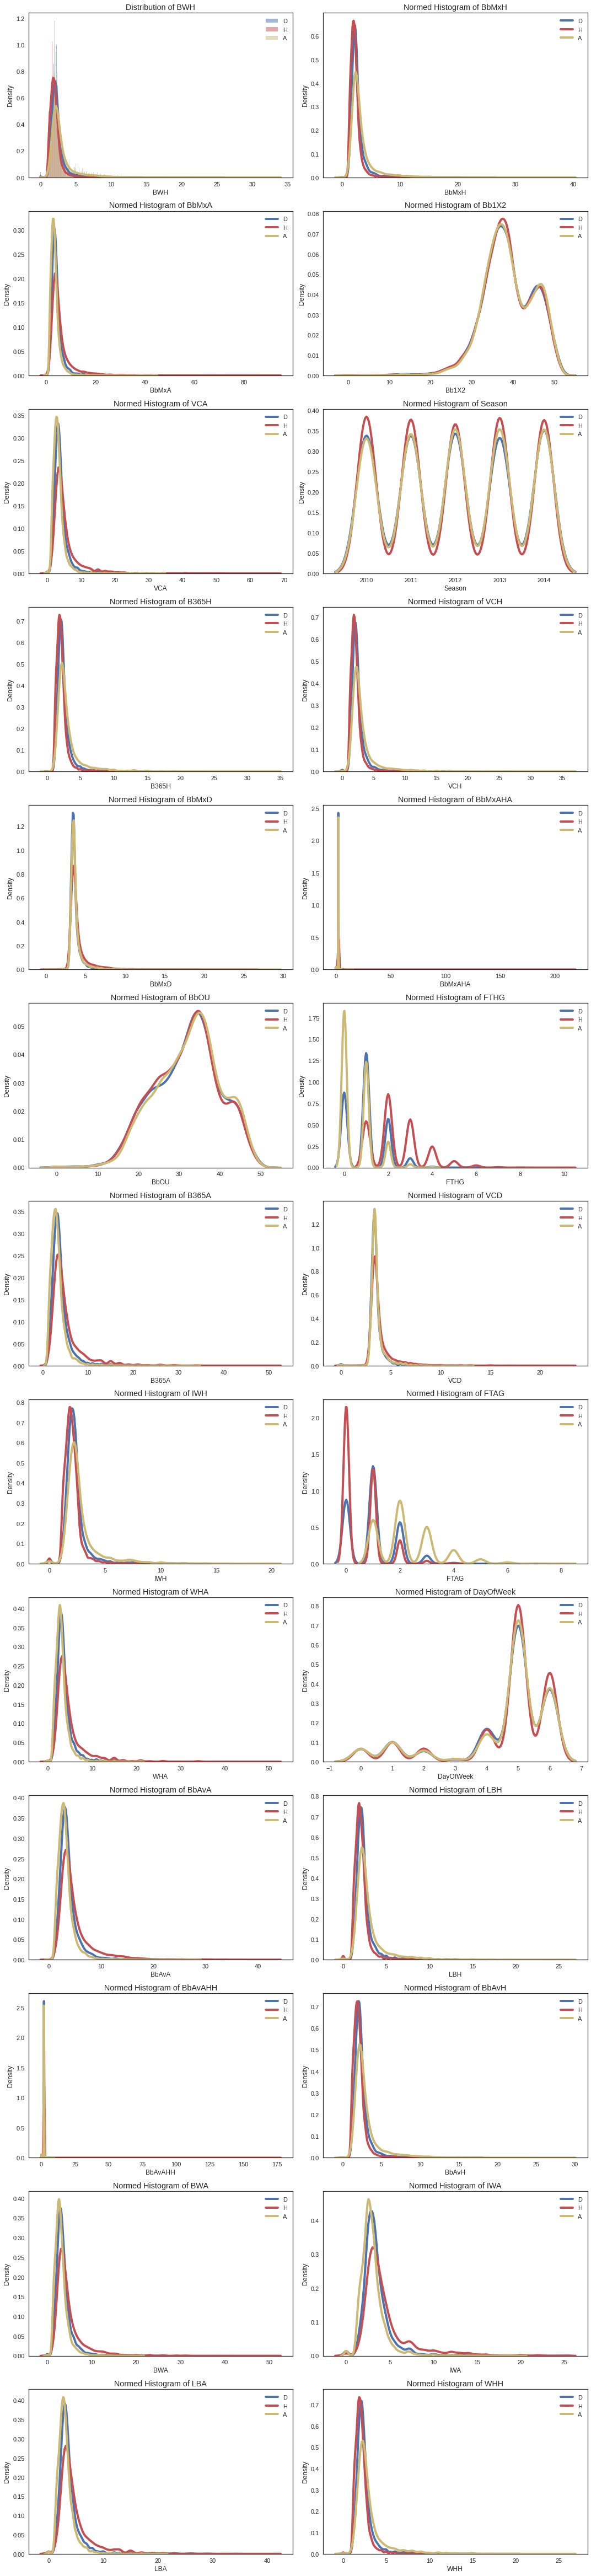

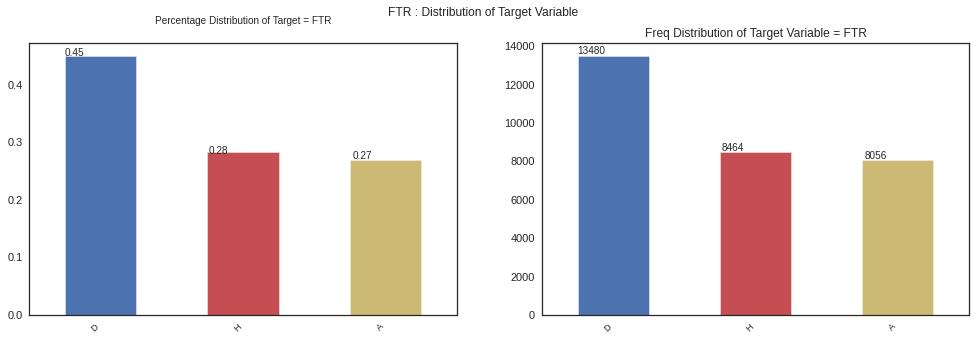

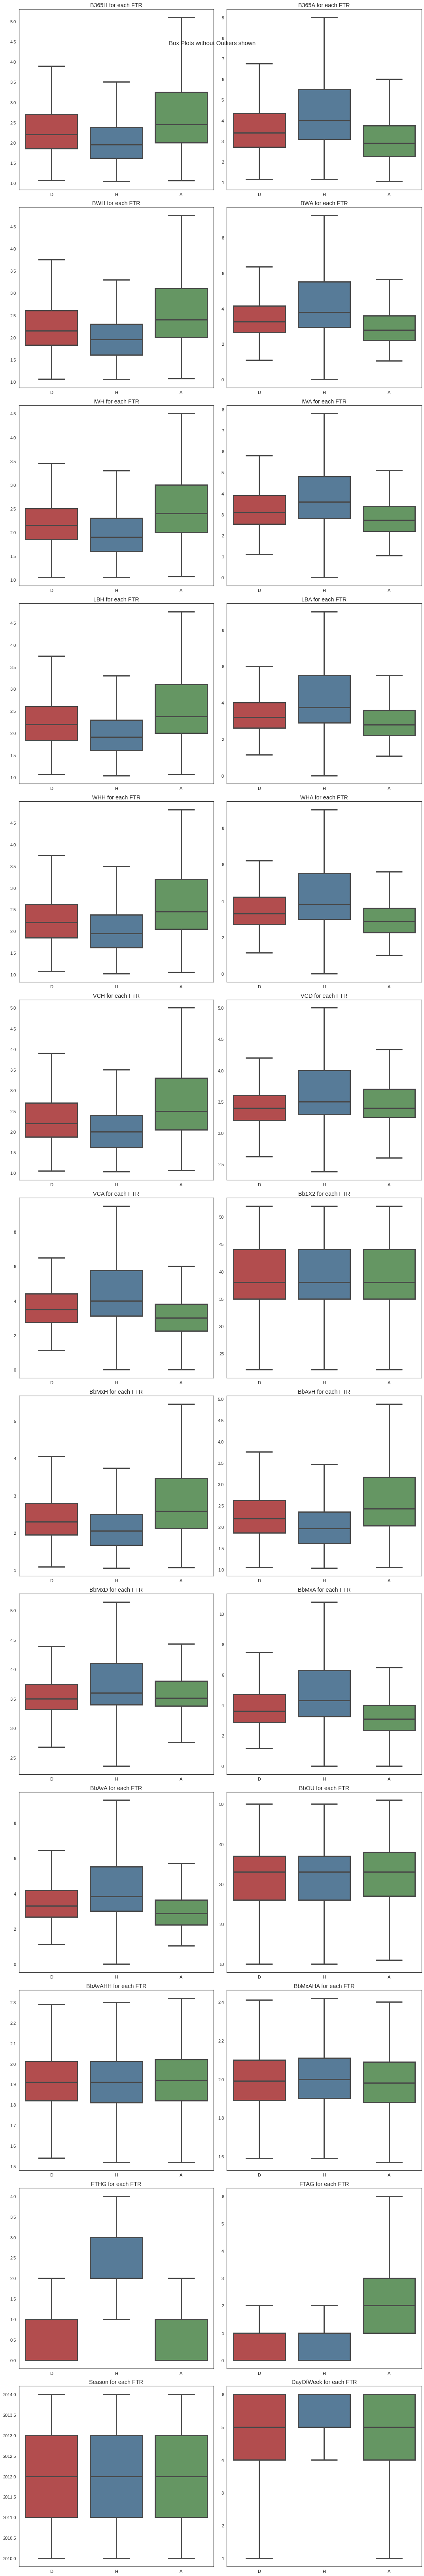

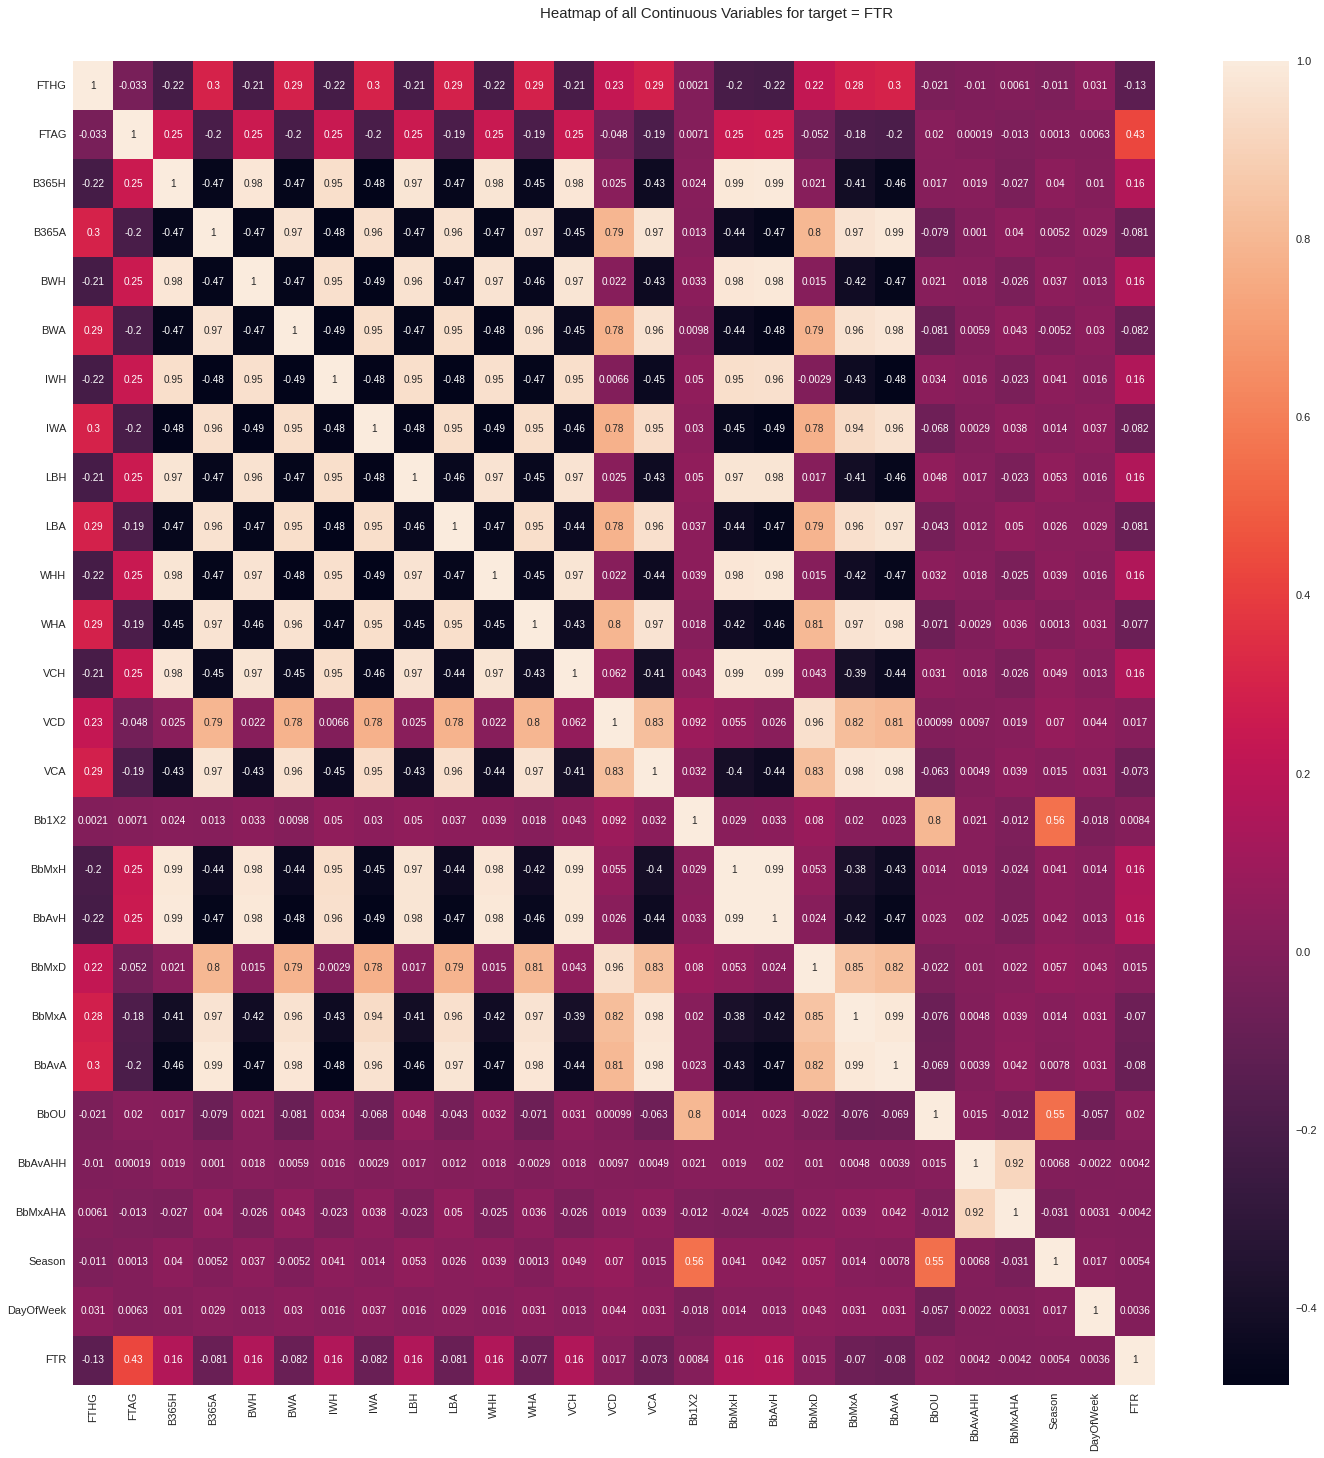

No categorical or boolean vars in data set. Hence no pivot plots...
No categorical or numeric vars in data set. Hence no bar charts.
All Plots done
Time to run AutoViz = 348 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


FTHG  FTAG  B365H  B365A   BWH    BWA   IWH    IWA   LBH    LBA  ...  \
0       1.0   1.0   1.73   4.75  1.57   5.25  1.70   4.00  1.73   4.00  ...   
1       4.0   1.0   1.20  10.00  1.20  11.00  1.20  10.00  1.17  12.00  ...   
2       1.0   0.0   3.75   1.91  3.75   1.87  3.30   1.90  3.20   2.00  ...   
3       2.0   0.0   1.91   3.80  1.88   3.50  1.75   3.90  1.80   3.75  ...   
4       1.0   0.0   2.10   3.20  2.10   3.00  2.00   3.10  1.91   3.40  ...   
...     ...   ...    ...    ...   ...    ...   ...    ...   ...    ...  ...   
29995   2.0   2.0   5.50   1.62  5.50   1.60  4.60   1.55  5.00   1.60  ...   
29996   1.0   1.0   1.25  12.00  1.20  12.00  1.15  13.00  1.20  11.00  ...   
29997   0.0   3.0   3.75   1.91  3.80   1.78  4.00   1.70  4.00   1.70  ...   
29998   0.0   1.0   3.50   2.10  0.00   0.00  3.30   2.00  3.40   1.95  ...   
29999   1.0   1.0   1.45   7.00  1.45   7.25  1.45   6.00  1.44   7.00  ...   

       BbAvH  BbMxD  BbMxA  BbAvA  BbOU  BbAvAHH  BbMxAHA  Season  DayOfWeek  \
0       1.69   3.70   5.25   4.68  19.0     1.27     3.80  2010.0        4.0   
1       1.19   6.50  15.00  12.20  12.0     1.03    11.48  2010.0        5.0   
2       3.53   3.45   2.05   1.95  17.0     2.62     1.50  2010.0        5.0   
3       1.92   3.50   4.00   3.68  19.0     2.02     1.88  2010.0        5.0   
4       2.11   3.40   3.40   3.19  19.0     1.56     2.50  2010.0        5.0   
...      ...    ...    ...    ...   ...      ...      ...     ...        ...   
29995   5.15   4.20   1.70   1.63  38.0     1.95     1.93  2014.0        6.0   
29996   1.24   6.55  16.00  11.46  35.0     1.89     2.02  2014.0        6.0   
29997   3.76   3.80   2.20   1.89  38.0     1.89     1.98  2014.0        6.0   
29998   3.22   3.80   2.27   2.14  38.0     1.92     1.97  2014.0        6.0   
29999   1.46   5.00   8.00   6.72  37.0     1.85     2.03  2014.0        6.0   

       FTR  
0        0  
1        1  
2        1  
3        1  
4        1  
...    ...  
29995    0  
29996    0  
29997    2  
29998    2  
29999    0  

[30000 rows x 27 columns]

In [3]:
# Instanciando objeto da classe AutoViz_Class
AV = AutoViz_Class()

# parâmetros: base de dados, variável alvo
AV.AutoViz('clean_base.csv', depVar='FTR')

Os gráficos acima mostram as 4 variáveis que mais me chamaram a atenção:  
- IWA
- LBA
- BbAvH
- FTHG  

Surpreendentemente, 3 delas correspondem à revisões de entidades especializadas no assunto: IWA (Interwetten away win odds), LBA (Ladbrokes away win odds) e BbAvH (Betbrain home win odds). A última variável (FTHG) corresponde ao número total de gols do time que está jogando em casa.
<br></br>

Em menos de 10 minutos é possível ter uma visão global sobre o problema e entender que talvez as opiniões de especialistas sobre qual time de futebol ganhará a partida sejam mais úteis do que as previsões de analistas financeiros sobre qual será a próxima ação a subir 50% (rsrs..).  
<br></br>

Portanto, já temos um ponto de partida interessante para seguir e refinar a etapa de *Exploratory Data Analysis*. Como meu intuito foi apresentar a AutoViz, deixo algumas sugestões de exercício para você se divertir nessa etapa de extrema importância para geração de valor em qualquer pipeline de dados.
<br></br>
#### Sugestões  
1. Separar os odds de cada empresa em quantis e analisar a percentagem de gols do time da casa por quantil.  
2. Verificar se existe dependência temporal entre cada uma das 4 variáveis e o alvo da análise (FTR).
3. Criar novas variáveis como (scores)/FTHG ou FTAG/FTHG e verificar se possuem potencial preditivo.
4. Inserir médias móveis ou normalizar as variáveis com dependência temporal
<br></br>

## 4) Considerações Finais
> - Utilize AutoViz no inicio, mas não se torne dependente dele.
> - Escolha poucas variáveis, elabore uma tese de avaliação e comece por aí.
> - Divida datasets maiores em *chunks* menores de dados. Será mais rápido plotar os gráficos e você não terá muitos problemas com isso.
> - AutoViz não lida muito bem com *Big Data*. Considere outros frameworks (como PySpark) para bases de dados com mais de 150 mil registros.  
<br></br>

Você pode encontrar o código completo deste artigo no meu [GitHub](https://github.com/jose-raposo).